# Survival Analysis of Heart Failure patients

This Project is a study of the patients survival rate due to heart failure condition. One of the premise of this study is that it was based on other researches on Cardiovascular diseases of the heart, which has become very common in medical profession. For more understanding on ths study use link below 

https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5

For this project, we used different models from lifelines python library to predict patients survival of heart failure. The data comprised of 13 features and 299 observations.

Features: age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium	sex, smoking, time and death_event

In [713]:
# Libraries to be used for the model (project)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from lifelines import WeibullFitter
from lifelines import KaplanMeierFitter
from lifelines import ExponentialFitter
from lifelines import LogNormalFitter
from lifelines.plotting import plot_lifetimes

Next thing we do is to load the data to run the survival analysis after calling the basic library

In [714]:
dat=pd.read_csv("Desktop/Data.csv") # dataset containing 299 rows and 13 columns was used for this analysis
display(dat)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,2,582,2,20,1,265000.00,1.9,130,1,2,4,1
1,55.0,2,7861,2,38,2,263358.03,1.1,136,1,2,6,1
2,65.0,2,146,2,20,2,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,2,20,2,210000.00,1.9,137,1,2,7,1
4,65.0,1,160,1,20,2,327000.00,2.7,116,2,2,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,2,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,2,1820,2,38,2,270000.00,1.2,139,2,2,271,0
296,45.0,2,2060,1,60,2,742000.00,0.8,138,2,2,278,0
297,45.0,2,2413,2,38,2,140000.00,1.4,140,1,1,280,0


# Data Cleaning

In [715]:
# The next step is to clean the data, but first we examined data structure of each variables type
# By simple observation, we can tell that some columns are boolen or binary values. Meaning they can only assume 2 values
# either 1 or 2, true/false, yes/no, male/female

# we extracted those columns and ran a test on the reminder columns to check for missing values

dat2=dat[['age','creatinine_phosphokinase','ejection_fraction',
             'platelets','serum_creatinine','serum_sodium','time']]

pd.isna(dat2) # pd.isna to check missing values

# There are no missing values which indicates the data is cleaned.


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False


# Data description and basic statistics

The table below shows the basic statistics of the different variables which gives the mean, std, quantile ranges and maximum and minimum values of each variable. 
Also helps with an indication of how the data is distributed.

In [716]:
# for continuous variable in the data
dat2.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [717]:
# for categorical variable in the data
categoricaldata=pd.read_csv("Desktop/catbook.csv") # dataset containing 299 rows and 13 columns was used for this analysis
display(categoricaldata)
# Table below shows the percentage summary of the different categorical variables in the data. 
# Its also further split into dead and survived patients.

,Category feature,Total,%,Dead Total,%.1,Survived Total,%.2
0,Anaemia_nopresence,170,56.86,50,52.08,120,59.11
1,Anaemia_presence,129,43.14,46,47.92,3,40.89
2,High blood pressure_nopresence,194,64.88,57,59.38,137,67.49
3,High blood pressure_presence,105,35.12,39,40.62,66,32.51
4,Diabetes_nopresence,174,58.19,56,58.33,118,58.13
5,Diabetes_presence,125,41.81,40,41.67,85,41.87
6,Sex_women,105,35.12,34,35.42,71,34.98
7,Sex_man,194,64.88,62,64.58,132,65.02
8,Smoking_nopresence,203,67.89,66,68.75,137,67.49
9,Smoking_presence,96,32.11,30,31.25,66,32.51


### Correlation

Because this study focuses on multivariate features in patients survival rate (death rate) from heart failure, we tried to get an overview of how the features are associated by doing a correlation to determine if there is any other relationship that exist between them.

In [718]:
# We also used Correlation matrix to determine the relationship between features that are highly correlated
round(dat.corr(),3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000,-0.088,-0.082,0.101,0.060,-0.092,-0.052,0.159,-0.046,-0.075,-0.059,-0.224,0.254
anaemia,-0.088,1.000,0.191,-0.013,-0.032,0.025,0.044,-0.052,-0.042,-0.106,-0.089,0.141,-0.066
creatinine_phosphokinase,-0.082,0.191,1.000,0.010,-0.044,0.069,0.024,-0.016,0.060,-0.073,0.004,-0.009,0.063
diabetes,0.101,-0.013,0.010,1.000,0.005,0.004,-0.092,0.047,0.090,-0.168,-0.156,-0.034,0.002
ejection_fraction,0.060,-0.032,-0.044,0.005,1.000,-0.024,0.072,-0.011,0.176,0.162,0.064,0.042,-0.269
high_blood_pressure,-0.092,0.025,0.069,0.004,-0.024,1.000,-0.033,0.007,-0.050,-0.102,-0.044,0.174,-0.068
platelets,-0.052,0.044,0.024,-0.092,0.072,-0.033,1.000,-0.041,0.062,0.127,-0.018,0.011,-0.049
serum_creatinine,0.159,-0.052,-0.016,0.047,-0.011,0.007,-0.041,1.000,-0.189,-0.004,0.032,-0.149,0.294
serum_sodium,-0.046,-0.042,0.060,0.090,0.176,-0.050,0.062,-0.189,1.000,0.010,-0.009,0.088,-0.195
sex,-0.075,-0.106,-0.073,-0.168,0.162,-0.102,0.127,-0.004,0.010,1.000,0.404,0.027,-0.016


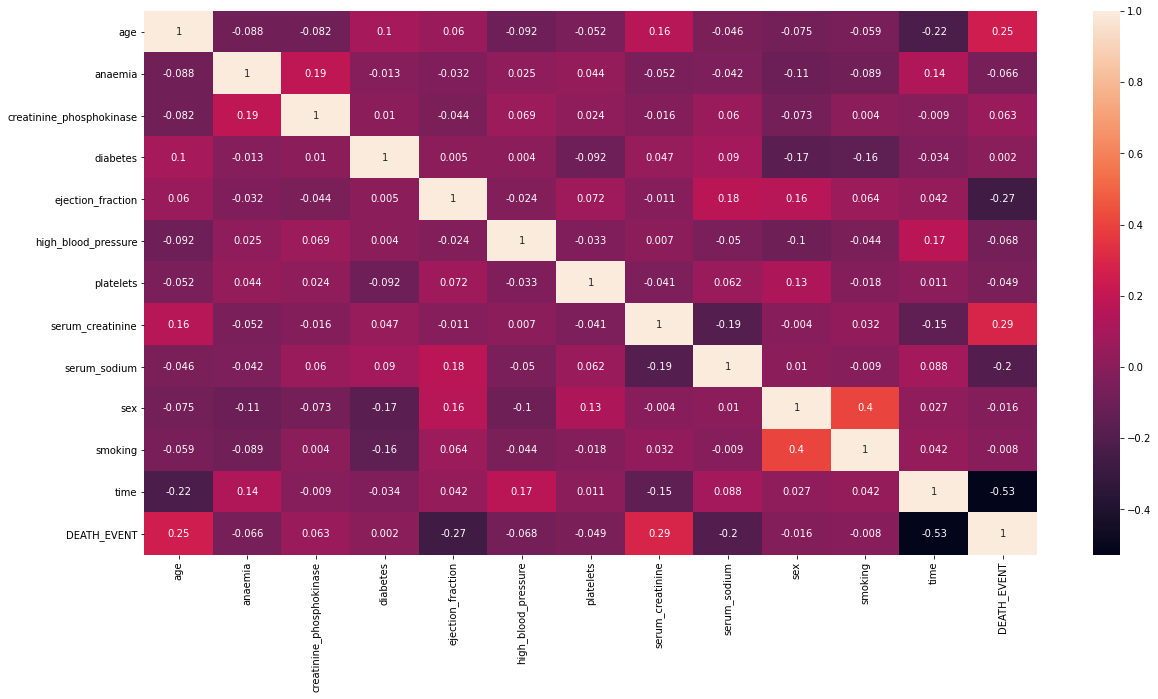

In [719]:
import seaborn as sns
# Correlation visualization to show continuous features that are highly correlated
plt.figure(figsize=[20,10])
matrix=round(dat.corr(),3)
sns.heatmap(matrix,annot=True)  # cmap="YlGnBu"
plt.show()

The correlation plots help us identify other relationships between the features. From the correlation plot, Time(follow-up period) seems to be the highest positive relationship with death_event. This is understable as patients recovery is associated with recuperation time. There also seems to be a 40% relationship between sex and smoking. These results can be used for future studies with other multivariate techniques.

### Lifeline plots

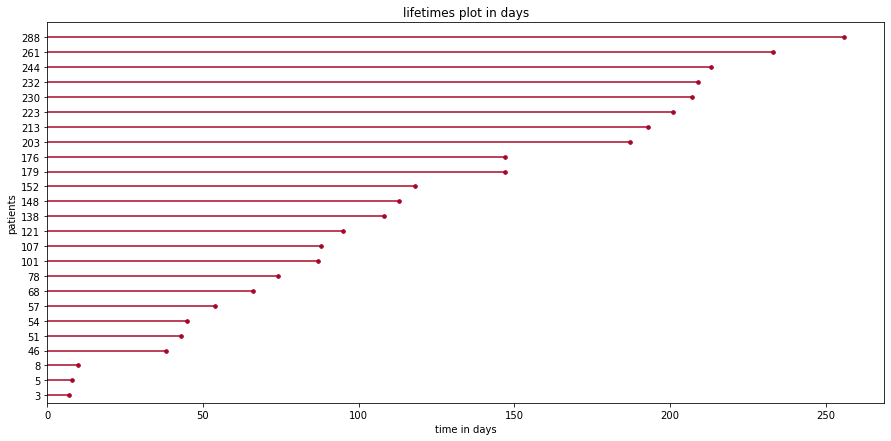

In [720]:
# lifelines plot of the dataset to show days survived and death event occurence
df=dat.sample(25)  # random sampling of data
plt.figure(figsize=[15,7])
plot_lifetimes(df['time'])
plt.title('lifetimes plot in days')
plt.xlabel('time in days')
plt.ylabel('patients')
plt.show()

### Histogram to show frequency of death patients against survived time in days

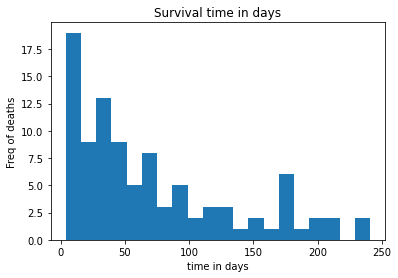

In [721]:
# Survival model to predict patients death rate and survival probability
T=dat[dat['DEATH_EVENT']==1]['time']  # 1 means a death_event occured, while 0 is patient survived
#plt.figure(figsize=[15,7])           # we selected death event to visualize how long they survived
plt.hist(T,bins=20)
#plt.hist(T)

plt.title('Survival time in days')
plt.xlabel('time in days')
plt.ylabel('Freq of deaths')
plt.show()

### Cummulative failure plots to describe death rate

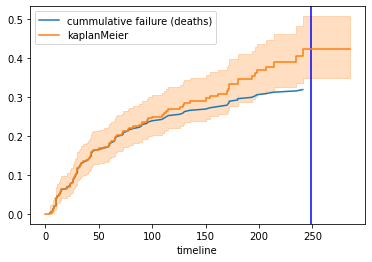

In [722]:
# Next we calculate the cummulative failure probability, to show the chance of failure (death) by time (days)
dsort=dat.sort_values(by='time')
#display(dsort)
cumdat=dsort[dsort['DEATH_EVENT']==1] # exact failure data after removing censored data
#display(cumdat)
cumfailure=cumdat['DEATH_EVENT'].cumsum()    # cumulative failure data
#Ft=cumfailure/299   # failure rate
Ft=(cumfailure-0.3)/(299+0.4) # failure rate using rank
plt.plot(cumdat['time'],Ft,label='cummulative failure (deaths)')
plt.axvline(x=249, color='b')
# kaplanmeier
km=KaplanMeierFitter()
kmf=km.fit(dat['time'],dat['DEATH_EVENT'])
#kmf.plot()
kmf.plot_cumulative_density(label='kaplanMeier')

plt.legend()
plt.show()

From the plot, there is a slight difference in the projection of curves between the 2 kaplanmeier and cummulative failure rate.
However, the curves also indicates increasing death rate overtime, but stops before the 250th day of the follow-up time, where there seems to be no more deaths (heart failure).

Next we worked on the development of a model which we can use to predict the survival rate of patients with heart failure. For this we tried diffrent distribution models to check which one will be a better fit. 
2 distributions we considered were weibull distribution and exponential distribution.

We also compared the model estimates and considered maximum likelihood and AIC of both models. A model with a smaller AIC value is a better fit, while the model with a higher(maximum) loglikehood is a good fit.

Other things considered was kaplanmeier survival plot against the survival plots of both models to visualize the direction of the curve.

And finally a comparism of the data probability plot, to check how the observations are clustered along the intercept. This is also a good indication that the model will be a better fit if the observations are aligned with the slope curve of the model.

In [723]:
# Now we compared different distribution models to to check which 
# model will accurately predict patients death rate and survival probability
# For this we used maximum likelihood estimation and AIC index to check model fitting

print('############################## exponential ###################################')
# exponential distribution
ef=ExponentialFitter().fit(dat['time'],dat['DEATH_EVENT'])
display(ef.summary)
print ("AIC of Exponential model is: ",ef.AIC_)  # AIC index- smallest AIC index is a better fit
exp=ef.log_likelihood_
print('The loglikelihood for exponential dist is', round(exp,2)) # highest loglihood is a better fit because we want maximize loglihood
#ef.print_summary()

print('\n############################## weibull ###################################')
# weibull
wf=WeibullFitter().fit(dat['time'],dat['DEATH_EVENT'])
display(wf.summary)
print ("AIC of Weibull model is: ", wf.AIC_) 
wei=wf.log_likelihood_
print('The loglikelihood for weibull dist is', round(wei,2))
#wf.print_summary()



############################## exponential ###################################


,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,405.708301,41.407427,324.551236,486.865366,0.0,9.79796,1.148826e-22,72.882258


AIC of Exponential model is:  1347.081826041116
The loglikelihood for exponential dist is -672.54

############################## weibull ###################################


,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,491.735790,80.564012,333.833227,649.638352,1.0,6.091253,1.120303e-09,29.733464
rho_,0.833304,0.076913,0.682557,0.984051,1.0,-2.167328,3.020983e-02,5.048838


AIC of Weibull model is:  1344.8757115822702
The loglikelihood for weibull dist is -670.44


After running innitial analyais, its observed that Weibull distribution has a higher loglikelihood and the smallest AIC when compared with exponential model. 
Therefore its a better fit for the model.
Below is also visual represesentation of the distribution models in comparism with kaplanmeier fitting

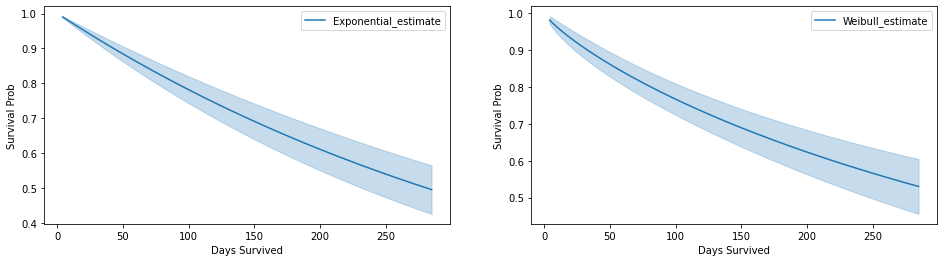

############################## Comparing survival curve ###################################


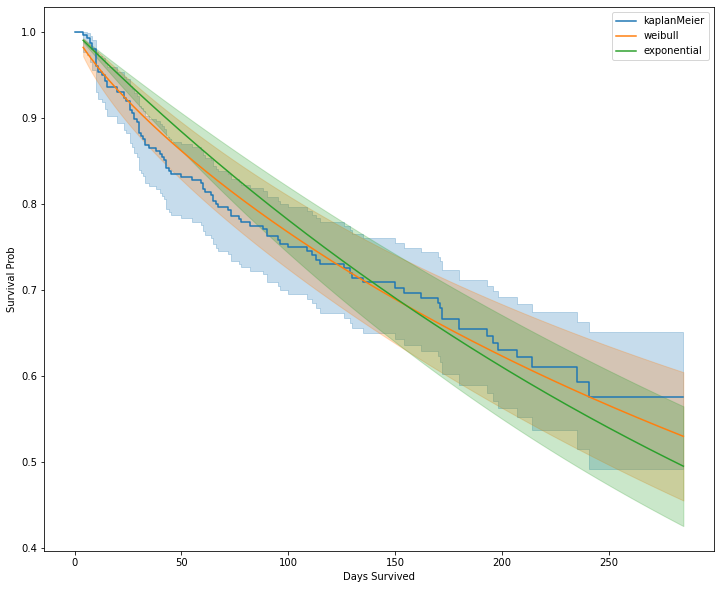

In [724]:
# survival probability plot of different distribution models in comparism with kaplanmeier probability plot

# probability plots of different models
plt.figure(figsize=[16,4])
plt.subplot(1,2,1)  # # exponential
ef.plot_survival_function()
plt.xlabel('Days Survived')
plt.ylabel('Survival Prob')

plt.subplot(1,2,2)  # weibull
wf.plot_survival_function()
plt.xlabel('Days Survived')
plt.ylabel('Survival Prob')
plt.show()

#wf.plot_hazard()
#plt.xlabel('Days Survived')
#plt.ylabel('Hazard Rate')
#plt.show()


# Comparing survival curve of 2 models with kaplanMeier
print('############################## Comparing survival curve ###################################')

# kaplanMeier
plt.figure(figsize=[12,10])
km.plot(label='kaplanMeier')
#weibull distribution
wf.plot_survival_function(label='weibull')
# exponential distribution
ef.plot_survival_function(label='exponential')

plt.xlabel('Days Survived')
plt.ylabel('Survival Prob')
plt.show()

The curve indicates a steady decline in patients death rate after 250 days. This means most patients who died of heart failure happened in the earlier days of treatment. This might be due to risk of the underling cause of the heartfailure, or may be the patients were unable to get adequate treatment.

And finally the probability plot of the 2 models to reveal which one has more observations clustered around slope line

############################## exponential ###################################
                                 OLS Regression Results                                
Dep. Variable:            DEATH_EVENT   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              1367.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):                    3.43e-58
Time:                        23:23:29   Log-Likelihood:                          143.43
No. Observations:                  96   AIC:                                     -284.9
Df Residuals:                      95   BIC:                                     -282.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err         

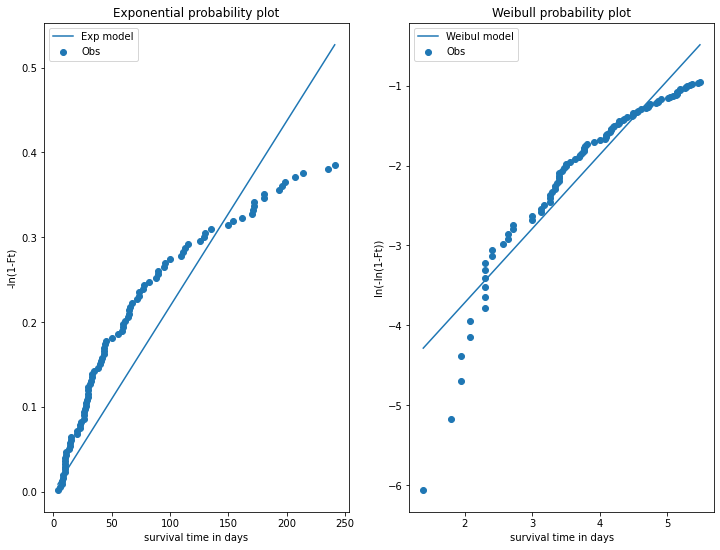

In [725]:
# probability data ploting is another way to check model fitting and also helps in validating maximum likelihood estimation

print('############################## exponential ###################################')

# exponential
# Assuming the life-time of the patients follow exponential distribution, we can fit the model in 
# ordinary least squares regression to estimate coefficients that helps us to visualise the data
# Input and output is derived by using exponential distribution formula for reliability -ln(1-Ft)=lambda*time

#cumdat
expl=cumdat['time']
lnft=-np.log(1-Ft)  
elm=sm.OLS(lnft,expl)  # because its exponential, it doesn't require a constant
res_elm=elm.fit()
print(res_elm.summary())
print('lambda is:', res_elm.params.time)

plt.figure(figsize=[12,9])
plt.subplot(1,2,1)
plt.scatter(expl,lnft,label='Obs')
plt.plot(expl,res_elm.predict(expl) ,label='Exp model')
plt.title('Exponential probability plot')
plt.xlabel('survival time in days')
plt.ylabel('-ln(1-Ft)')
plt.legend()
print('\n############################## weibull ###################################')

# weibull formula for reliability ln(-ln(1-Ft))= beta*ln*time - beta*ln*alpha
weil= np.log(cumdat['time'])  
xweil= sm.add_constant(weil) # weibull requires a constant because it has slope and intersect
yweil= np.log(lnft)
wlm=sm.OLS(yweil,xweil)
res_wlm=wlm.fit()
print(res_wlm.summary())
print('alpha is:', np.exp(-(res_wlm.params.const/res_wlm.params.time)))
print('beta is:', 1/res_wlm.params.time)

plt.subplot(1,2,2)
plt.scatter(weil,yweil,label='Obs')
plt.plot(weil,res_wlm.predict(xweil) ,label='Weibul model')
plt.title('Weibull probability plot')
plt.xlabel('survival time in days')
plt.ylabel('ln(-ln(1-Ft))')
plt.legend()
plt.show()

Comparing between them, it shows that weibul is a better fit for the model.
Now we would use the weibull model to predict other features affecting heartfailure of the patients, 
This will help us determine which features are highly associated with patients survival

In [726]:
# age	creatinine_phosphokinase	ejection_fraction	platelets	serum_creatinine	serum_sodium	DEATH_EVENT
cumdat2=cumdat[['age','creatinine_phosphokinase','ejection_fraction',
                'platelets','serum_creatinine','serum_sodium']]    # subseting continuous features
cumdat2

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.90,130
1,55.0,7861,38,263358.03,1.10,136
2,65.0,146,20,162000.00,1.30,129
3,50.0,111,20,210000.00,1.90,137
4,65.0,160,20,327000.00,2.70,116
...,...,...,...,...,...,...
220,73.0,582,20,263358.03,1.83,134
230,60.0,166,30,62000.00,1.70,127
246,55.0,2017,25,314000.00,1.10,138
262,65.0,258,25,198000.00,1.40,129



############################## age ###################################


,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,70.651805,1.428920,67.851174,73.452436,1.0,48.744382,0.000000e+00,inf
rho_,5.345640,0.411925,4.538281,6.152999,1.0,10.549579,5.102532e-26,84.018917


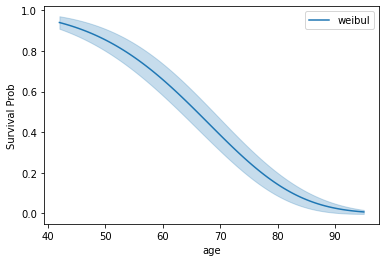


############################## creatinine_phosphokinase ###################################


,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,551.824846,76.796256,401.306950,702.342742,1.0,7.172548,7.361450e-13,40.305075
rho_,0.780300,0.054459,0.673562,0.887038,1.0,-4.034208,5.478686e-05,14.155811


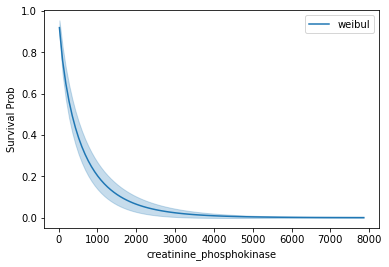


############################## ejection_fraction ###################################


,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,37.613387,1.429357,34.811899,40.414875,1.0,25.615286,1.030769e-144,478.313924
rho_,2.848726,0.215262,2.426819,3.270632,1.0,8.588244,8.830884e-18,56.652148


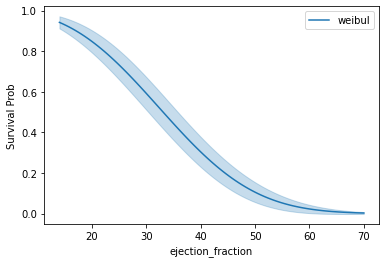


############################## platelets ###################################


,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,287538.155810,11229.168689,265529.389604,309546.922017,1.0,25.606273,1.298882e-144,477.980375
rho_,2.756795,0.208681,2.347788,3.165802,1.0,8.418574,3.810943e-17,54.542630


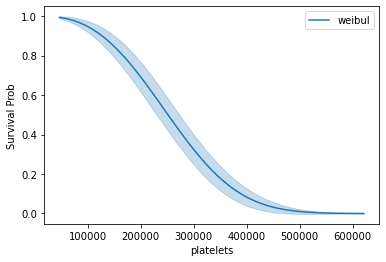


############################## serum_creatinine ###################################


,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,2.063559,0.148934,1.771653,2.355465,1.0,7.141130,9.256674e-13,39.974571
rho_,1.507325,0.100534,1.310282,1.704368,1.0,5.046303,4.504418e-07,21.082156


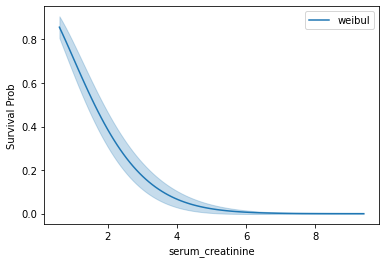


############################## serum_sodium ###################################


,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,137.668670,0.489708,136.708860,138.628480,1.0,279.082022,0.000000e+00,inf
rho_,30.354604,2.280551,25.884806,34.824402,1.0,12.871716,6.494321e-38,123.534089


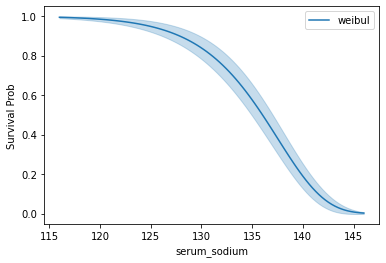

In [727]:
# using weibull survival model to observe other features against patients death
for column in cumdat2:
    
    print('\n##############################',column,'###################################')
    wf=WeibullFitter().fit(cumdat2[column],cumdat['DEATH_EVENT'])
    display(wf.summary)
    
    wf.plot_survival_function(label='weibul')
    plt.xlabel(column)
    plt.ylabel('Survival Prob')
    plt.show()
    

Among the different features, we observered the alpha of each feature, serum_creatinine with alpha value of 2.063559 and ejection_fraction with alpha value of 37.613387 which is very low compared with others. low alpha values indicate features are at risk, because the alpha tells us about the characteristic life of the model and how long it will last before it fails. Hence we want alphas of high values. 
Age is another likely indicator, it is the feature with the 3rd least alpha value of 70.651805. But observing the curve, its likely that patients within that age range from 70 and upwards have low survival probability. Other researches also concluded with same phenomenon that they are likely to have heart failure because they are in their older years of living.

In [728]:
# checking accuracy of model technique 1

#from sklearn.model_selection import train_test_split

#cumdat2['Ft']=Ft # adding failure rate
#df_train, df_test = train_test_split(cumdat2, train_size=0.7, test_size=0.3)

#lnft2=-np.log(1-df_train['Ft'])


#weil= np.log(df_train)  
#xweil= sm.add_constant(weil) # weibull requires a constant because it has slope and intersect    
#yweil= np.log(lnft2)
#wlm=sm.OLS(yweil,xweil)
#res_wlm=wlm.fit()
#print(res_wlm.summary())


We can  CoxPHFitter from lifeline to check model accuracy and fitting. It will also help rank the features based on which features are high risk for predicting survival probability of the patients

In [729]:
# checking accuracy of model using CoxPHFitter from lifelines

from lifelines import CoxPHFitter
cph=CoxPHFitter()
cph.fit(dat, duration_col='time',event_col='DEATH_EVENT')
display(cph.summary)
display(cph.check_assumptions(dat, show_plots=False))

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age,4.584074e-02,1.046908,0.009278,0.027656,0.064026,1.028042,1.066120,0.0,4.940629,7.787076e-07,20.292415
anaemia,-4.671758e-01,0.626770,0.215895,-0.890321,-0.044030,0.410524,0.956925,0.0,-2.163908,3.047145e-02,5.036398
creatinine_phosphokinase,2.155390e-04,1.000216,0.000099,0.000021,0.000410,1.000021,1.000410,0.0,2.173347,2.975422e-02,5.070762
diabetes,-1.392864e-01,0.869979,0.223084,-0.576523,0.297950,0.561848,1.347095,0.0,-0.624367,5.323864e-01,0.909454
ejection_fraction,-4.855312e-02,0.952607,0.010523,-0.069178,-0.027928,0.933161,0.972458,0.0,-4.613947,3.950929e-06,17.949377
high_blood_pressure,-4.316403e-01,0.649443,0.210035,-0.843301,-0.019980,0.430288,0.980218,0.0,-2.055090,3.987031e-02,4.648541
platelets,-3.470572e-07,1.000000,0.000001,-0.000003,0.000002,0.999997,1.000002,0.0,-0.311286,7.555835e-01,0.404337
serum_creatinine,3.237701e-01,1.382330,0.070255,0.186073,0.461467,1.204511,1.586400,0.0,4.608514,4.055567e-06,17.911665
serum_sodium,-4.433929e-02,0.956629,0.023168,-0.089748,0.001070,0.914161,1.001070,0.0,-1.913786,5.564756e-02,4.167538


The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
         test_name = proportional_hazard_test

---
                               test_statistic    p  -log2(p)
age                      km              0.07 0.79      0.34
                         rank            0.02 0.90      0.16
anaemia                  km              0.00 0.99      0.02
                         rank            0.01 0.93      0.10
creatinine_phosphokinase km              1.10 0.29      1.77
                         rank            1.07 0.30      1.73
diabetes                 km              0.06 0.81      0.31
                         rank            0.00 0.96      0.06
ejection_fraction        km              5.68 0.02      5.87
                         rank            5.99 0.01      6.12
high_blood_pressure      km              0.20 0.66      0.61
                         rank            0.18 0.67      0.58
platelets                km              0.05 0.82      0.29
                         rank            0.16 0.69      0.53
serum_creatinine         km              3.23 0.07      3.79
                         rank            3.51 0.06      4.03
serum_sodium             km              1.11 0.29      1.77
                         rank            1.76 0.19      2.43
sex                      km              0.06 0.80      0.32
                         rank            0.15 0.70      0.52
smoking                  km              0.77 0.38      1.40
                         rank            0.52 0.47      1.08



1. Variable 'ejection_fraction' failed the non-proportional test: p-value is 0.0144.

   Advice 1: the functional form of the variable 'ejection_fraction' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'ejection_fraction' using pd.cut, and then specify it in
`strata=['ejection_fraction', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Prop

[]

Based on the rank ejection_fraction has the highest rank 5.99, serum_creatinine is the 2nd highest with 3.23 and the other continuous features are below 1.76.
For categorical, smoking is 0.52, high_blood_pressure is 0.18 and sex is 0.15, the others were below 0.01.

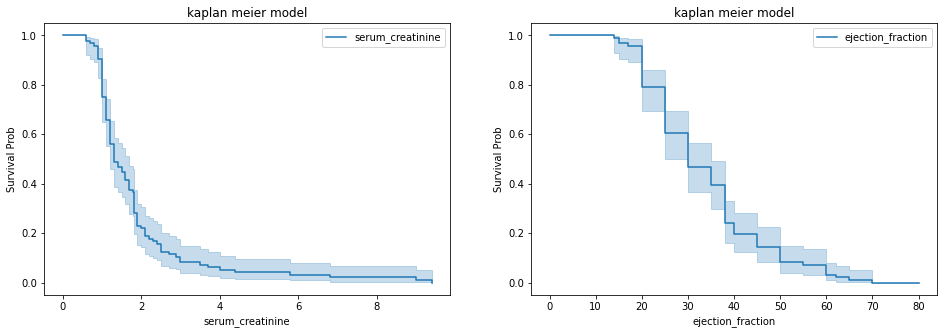

In [730]:
# kaplan Meier curve to compare the difference high risk continuous features

#wf=WeibullFitter().fit(cumdat2['serum_creatinine'],cumdat['DEATH_EVENT'])

plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
km1=KaplanMeierFitter().fit(dat['serum_creatinine'],weights=dat['DEATH_EVENT'])
km1.plot(label='serum_creatinine')
plt.xlabel('serum_creatinine')
plt.ylabel('Survival Prob')
plt.title('kaplan meier model')

plt.subplot(1,2,2)
km2=KaplanMeierFitter().fit(dat['ejection_fraction'],weights=dat['DEATH_EVENT'])
km2.plot(label='ejection_fraction')
plt.xlabel('ejection_fraction')
plt.ylabel('Survival Prob')

plt.title('kaplan meier model')
plt.show()

Serum creatinine measures the level of creatine in the blood and creatinine is waste product in the blood that comes from the muscles, healthy kidneys filter creatinine out of your blood through urine and higher creatinine of 0.7 - 1.3mg means the kidneys are not fuctioning well which may lead to hypertension and heart failure. 
Ejection fraction measures the volume of fluid ejected from heart chamber with contraction of the left ventricle and its measured is % of blood pumped out. High >70%, normal 70%< x >55%, low 55%< x >40% and 
heart failure < 40%

Based on the kaplan meier model, There are more patients with high serum creatinine levels with low survival rates when compared to patients low ejection fraction levels. 

Hence Serum creatinine is more associated with heart failure of the patients in this study.

In [731]:
# kaplan Meier curve to compare the difference between each categorical feature
catdata=cumdat[['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT']]

#print('\n############################## anaemia ###################################')
pcatdata=catdata[catdata['anaemia']==1] # this code indicates that there is presence / 1 also indicates male for sex feature
npcatdata=catdata[catdata['anaemia']==2] # this code indicates that there is no presence / 2 also indicates female for sex feature

akm1=KaplanMeierFitter().fit(pcatdata['time'],weights=pcatdata['DEATH_EVENT'])
akm2=KaplanMeierFitter().fit(npcatdata['time'],weights=npcatdata['DEATH_EVENT'])


In [732]:
#print('\n############################## diabetes ###################################')
pcatdata=catdata[catdata['diabetes']==1] # this code indicates that there is presence / 1 also indicates male for sex feature
npcatdata=catdata[catdata['diabetes']==2] # this code indicates that there is no presence / 2 also indicates female for sex feature

dkm1=KaplanMeierFitter().fit(pcatdata['time'],weights=pcatdata['DEATH_EVENT'])
dkm2=KaplanMeierFitter().fit(npcatdata['time'],weights=npcatdata['DEATH_EVENT'])


In [733]:
#print('\n############################## high_blood_pressure ###################################')
pcatdata=catdata[catdata['high_blood_pressure']==1] # this code indicates that there is presence / 1 also indicates male for sex feature
npcatdata=catdata[catdata['high_blood_pressure']==2] # this code indicates that there is no presence / 2 also indicates female for sex feature

hkm1=KaplanMeierFitter().fit(pcatdata['time'],weights=pcatdata['DEATH_EVENT'])
hkm2=KaplanMeierFitter().fit(npcatdata['time'],weights=npcatdata['DEATH_EVENT'])


In [734]:
#print('\n############################## smoking ###################################')
pcatdata=catdata[catdata['smoking']==1] # this code indicates that there is presence / 1 also indicates male for sex feature
npcatdata=catdata[catdata['smoking']==2] # this code indicates that there is no presence / 2 also indicates female for sex feature

skm1=KaplanMeierFitter().fit(pcatdata['time'],weights=pcatdata['DEATH_EVENT'])
skm2=KaplanMeierFitter().fit(npcatdata['time'],weights=npcatdata['DEATH_EVENT'])


In [735]:
#print('\n############################## sex ###################################')
pcatdata=catdata[catdata['sex']==1] # 1 indicates male for sex feature
npcatdata=catdata[catdata['sex']==2] # 2 indicates female for sex feature

mkm1=KaplanMeierFitter().fit(pcatdata['time'],weights=pcatdata['DEATH_EVENT'])
fkm2=KaplanMeierFitter().fit(npcatdata['time'],weights=npcatdata['DEATH_EVENT'])


<function matplotlib.pyplot.show(close=None, block=None)>

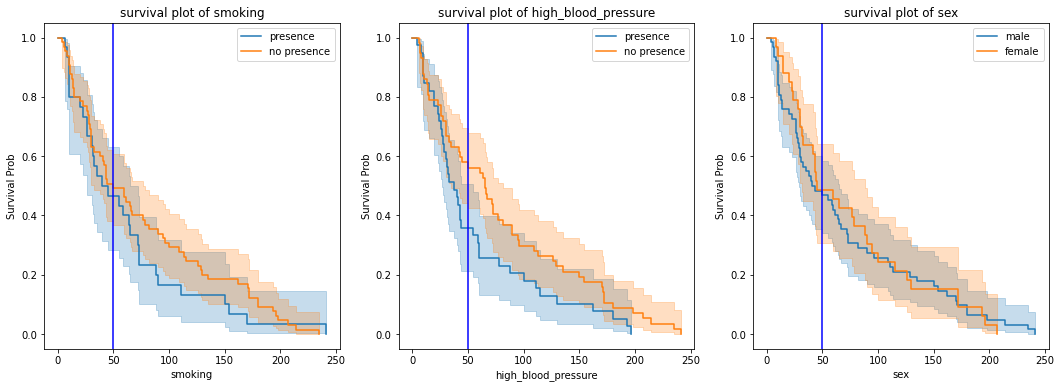

In [736]:
# categorical features with high risk associated to patients survival
# using 50 days as survival time to check survival probability rate for each feature

plt.figure(figsize=[18,6])
plt.subplot(1,3,1)
skm1.plot(label='presence')
skm2.plot(label='no presence')
plt.title('survival plot of smoking')
plt.xlabel('smoking')
plt.ylabel('Survival Prob')
plt.axvline(x=50, color='b')

plt.subplot(1,3,2)
hkm1.plot(label='presence')
hkm2.plot(label='no presence')
plt.title('survival plot of high_blood_pressure')
plt.xlabel('high_blood_pressure')
plt.ylabel('Survival Prob')
plt.axvline(x=50, color='b')

plt.subplot(1,3,3)
mkm1.plot(label='male')
fkm2.plot(label='female')
plt.title('survival plot of sex')
plt.xlabel('sex')
plt.ylabel('Survival Prob')

plt.axvline(x=50, color='b')
plt.show

From the model plots, we used 50days to measure a 50% survival rate for each feature. As a result we can observe that patients with high_blood_pressure are more at risk with heart failure when compared with the other features because the survival rate curve falls below 50% on the 50th day during follow-up periods. 
The survival rate for sex features tends to drop between male and female along the follow-up periods, with some instances showing female have higher survival rate than male. 
Other indications are patient smokers have a lower survival rate when compared to non smoking patients.

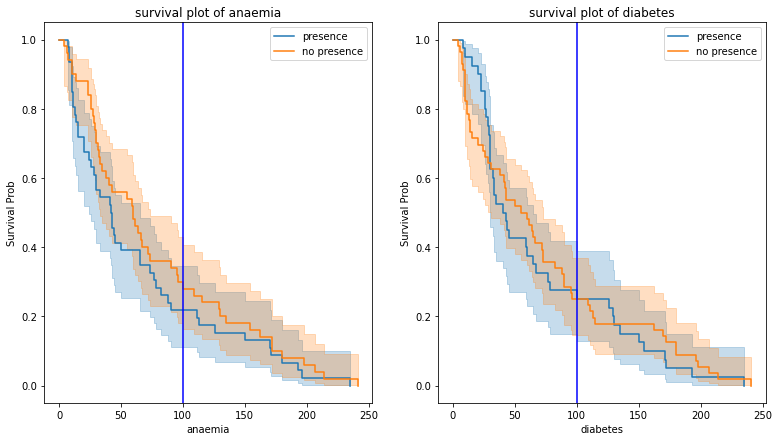

In [744]:
# Other low risk categorical features which are not associated with patient's survival

plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
akm1.plot(label='presence')
akm2.plot(label='no presence')
plt.title('survival plot of anaemia')
plt.xlabel('anaemia')
plt.ylabel('Survival Prob')
plt.axvline(x=100, color='b')
plt.subplot(1,3,2)
dkm1.plot(label='presence')
dkm2.plot(label='no presence')
plt.title('survival plot of diabetes')
plt.xlabel('diabetes')
plt.ylabel('Survival Prob')
plt.axvline(x=100, color='b')

From the model plots, there seem to be no significant difference between both features when comparing the survival rates below 50%, however in 100days of follow-up treatment patients who exibit diabetes, have a higher survival rate when compared to patients with presence of anaemia in their system.